#**Model Evaluation: Overcoming data-related challenges**
---

Case Study: Titanic Survival

**Objective:** The objective of this notebook is to walk you through several concepts that we discussed through the course for evaluating and improving ML models. You will be building and evaluating several models that will predict if a person survived or not during the Titanic incidence.

Doing that you will learn the importance of having the right data for your model

The titanic.csv file contains data for 891 of the original Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:
* whether they survived (S),
* their age (A),
* their passenger-class (C),
* their gender (G),
* the fare they paid (X).

Evaluating ML models

In this section, we will be building and evaluating ML models.

## Importing Needed Libraries:

* numpy: for scientific computing
* matplot: for plotting and visualization
* pandas: for data reading and manipulation
* sklearn.svm for Support Vector Machine Implementation




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Importing the Data

In [ ]:
data = pd.read_csv('titanic.csv') #Read the Data from the Drive

df = pd.DataFrame(data, columns= ['Survived', 'Pclass', 'Name', 'Age', 'Sex', 'Fare']) #Gets the specific data we need for our prediction
df.replace(('male', 'female'), (0, 1), inplace=True) #Male is 0, Female is 1
df.head() #Prints the first 5 rows of the data

,Survived,Pclass,Name,Age,Sex,Fare
0,0,3,"Braund, Mr. Owen Harris",22.0,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,71.2833
2,1,3,"Heikkinen, Miss. Laina",26.0,1,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,53.1000
4,0,3,"Allen, Mr. William Henry",35.0,0,8.0500


Know the shape of the data

In [ ]:
df.shape

(891, 6)

## Data PreProcessing:


Check for null values

In [ ]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Age         177
Sex           0
Fare          0
dtype: int64


Filling the null values

In [ ]:
df['Age'].fillna(value = df['Age'].mean(), inplace=True)

In [ ]:
print(df.isnull().sum()) #make sure all nulls are removed

Survived    0
Pclass      0
Name        0
Age         0
Sex         0
Fare        0
dtype: int64


Data preprocessing involves dividing the data into attributes and labels.

In [ ]:
x = df.drop(['Survived', 'Name'], axis = 1) #all the columns except the Name of the person and the target columns are being removed from the features data
y = df['Survived']

## K-fold Cross Validation
We will be implementing k-Fold CV on a Linear and a Gaussian SVM on the dataset shown above.

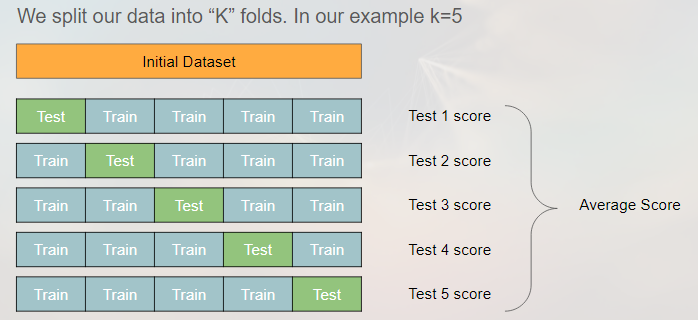









For that, we will be using a 5-fold cross validation:

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Create SVM classifiers for linear and Gaussian kernel
linear_svm = SVC(kernel='linear')
gaussian_svm = SVC(kernel='rbf')

# Define the number of folds for cross-validation
num_folds = 5

# Create a cross-validation object
kfold = KFold(n_splits=num_folds)

# Lists to store the accuracies
Lin_Accs = []
Ker_Accs = []

# Perform cross-validation for linear SVM
linear_scores = cross_val_score(linear_svm, x, y, cv=kfold)
Lin_Accs = linear_scores.tolist()

# Perform cross-validation for Gaussian SVM
gaussian_scores = cross_val_score(gaussian_svm, x, y, cv=kfold)
Ker_Accs = gaussian_scores.tolist()

# Print the accuracies for each fold
print("Linear SVM accuracies:")
for i, score in enumerate(Lin_Accs):
    print(f"Fold {i+1}: {score}")

print("\nGaussian SVM accuracies:")
for i, score in enumerate(Ker_Accs):
    print(f"Fold {i+1}: {score}")


Linear SVM accuracies:
Fold 1: 0.8156424581005587
Fold 2: 0.797752808988764
Fold 3: 0.7808988764044944
Fold 4: 0.7359550561797753
Fold 5: 0.8033707865168539

Gaussian SVM accuracies:
Fold 1: 0.5865921787709497
Fold 2: 0.6741573033707865
Fold 3: 0.6797752808988764
Fold 4: 0.6685393258426966
Fold 5: 0.7078651685393258


In [ ]:
print("Linear:")
print("The average accuracy for the Linear SVM is", sum(Lin_Accs)/len(Lin_Accs))

print("Kernel:")
print("The average accuracy for the Kernel SVM is", sum(Ker_Accs)/len(Ker_Accs))

Linear:
The average accuracy for the Linear SVM is 0.7867239972380893
Kernel:
The average accuracy for the Kernel SVM is 0.663385851484527


We can see from the results above that the average accuracy of the Linear SVM is higher than the kernel SVM according to the k-fold CV.

## Train & Test the models

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the models on the training data
linear_svm.fit(X_train, y_train)
gaussian_svm.fit(X_train, y_train)

# Test the models on a new instance
new_instance = pd.DataFrame([[1, 30, 0, 100]], columns=['Pclass', 'Age', 'Sex', 'Fare'])

X_new = new_instance[['Age', 'Pclass', 'Sex', 'Fare']]  # Extract the attributes for prediction


linear_prediction = linear_svm.predict(new_instance)
gaussian_prediction = gaussian_svm.predict(new_instance)

print(f"Linear SVM prediction: {linear_prediction}")
print(f"Gaussian SVM prediction: {gaussian_prediction}")

Linear SVM prediction: [0]
Gaussian SVM prediction: [1]


Test both models on same data but for a female passenger

In [ ]:
# Test the models on a new instance
new_instance = pd.DataFrame([[1, 30, 1, 100]], columns=['Pclass', 'Age', 'Sex', 'Fare'])

X_new = new_instance[['Age', 'Pclass', 'Sex', 'Fare']]  # Extract the attributes for prediction


linear_prediction = linear_svm.predict(new_instance)
gaussian_prediction = gaussian_svm.predict(new_instance)

print(f"Linear SVM prediction: {linear_prediction}")
print(f"Gaussian SVM prediction: {gaussian_prediction}")

Linear SVM prediction: [1]
Gaussian SVM prediction: [1]


Yes, the Linear SVM is biased toward gender of passengers